# Price Exploratory Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

In [33]:
# Load the Parquet file into a Pandas DataFrame
df = pd.read_parquet("../all_car_details.parquet")
pd.set_option('display.float_format', '{:.2f}'.format)  # 2 decimal places

In [34]:
# Basic statistics
print("Price summary statistics:")
print(df['price'].describe())
print("\nNumber of missing prices:", df['price'].isnull().sum())
print("Number of zero prices:", (df['price'] == 0).sum())

Price summary statistics:
count      505615.00
mean       133239.14
std        896730.36
min             1.00
25%         10500.00
50%         24950.00
75%        114897.50
max     555555555.00
Name: price, dtype: float64

Number of missing prices: 189
Number of zero prices: 0


As we can see there aren't too many records with missing prices, for our case we can just remove these records from the dataframe and then go on with checking for outliers.

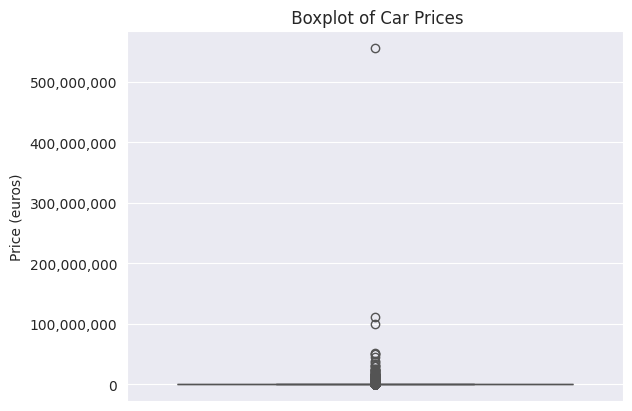

In [35]:
# Remove rows with missing prices
df = df[df['price'].notnull()]

# Boxplot to find outliers
sns.boxplot(y=df['price'])
sns.set_style("darkgrid")
sns.set_palette("muted")
plt.title(" Boxplot of Car Prices")
plt.ylabel("Price (euros)")
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

As we can see there are many outliers, let's remove them with the 99th percentile method, but let's for curiosity's sake also check what brand these cars are, as these prices may even be valid for brands like Bugatti, or museal pieces.

Number of rows after removing outliers: 495433
Removed: 10182 rows (2.01%)


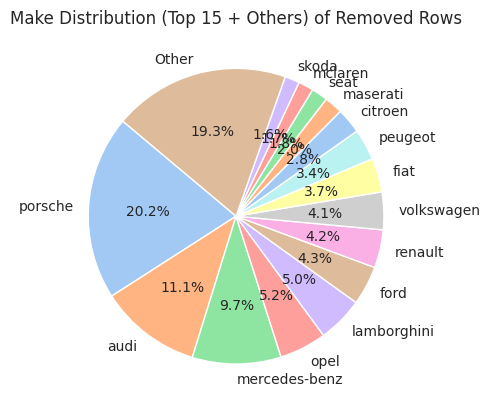

In [40]:
# Remove outliers on both ends
upper_price_threshold = df['price'].quantile(0.99)
lower_price_threshold = df['price'].quantile(0.01)
df_cleaned = df[(df['price'] < upper_price_threshold) &
                (df['price'] > lower_price_threshold)]
print(
    f"Number of rows after removing outliers: {len(df_cleaned)}\nRemoved: {len(df) - len(df_cleaned)} rows ({round(100 - len(df_cleaned) / len(df) * 100, 2)}%)")

# See the make distribution of the removed rows
df_removed = pd.concat([df, df_cleaned]).drop_duplicates(keep=False)
top_n = 15
make_counts = df_removed['make'].value_counts()
top_makes = make_counts.head(top_n)
other_count = make_counts.iloc[top_n:].sum()
top_makes['Other'] = other_count

plt.pie(
    top_makes,
    labels=top_makes.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel"),
)
plt.title("Make Distribution (Top 15 + Others) of Removed Rows")
plt.show()

Removing the outliers left us with 10371 fewer rows, which in case of such a large dataset may not be too bad. Only 2.05%.

As we can see many of the outliers are from premium car brands, supposedly the ones above the 99th percentile and we can also see that many popular brands show up with a few percentage points, these supposedly below the 1 percentile threshold.

Porsche is one of the biggest outliers, which is understandable as it is both a popular brand and has many retro / museal pieces.

Lamborghini however is concerning to see here as it is almost 5% of the outliers, which may be a significant portion of the brand's cars. For now it is fine but we have to take this into consideration when later for example building prediction models.

Let's see the boxplot again.

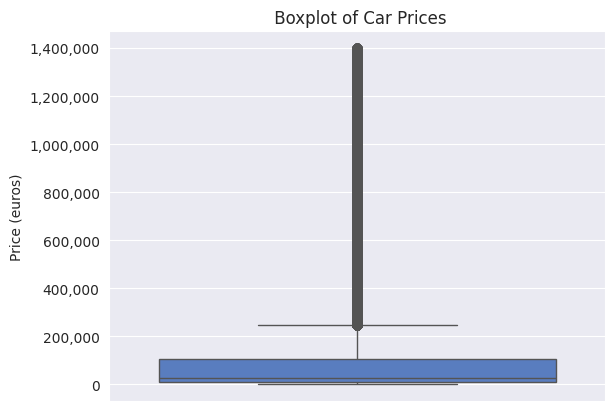

In [41]:
sns.boxplot(y=df_cleaned['price'])
sns.set_style("darkgrid")
sns.set_palette("muted")
plt.title(" Boxplot of Car Prices")
plt.ylabel("Price (euros)")
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

We can still see that there is a significant amount of outliers above, but our plot is looking a bit nicer now. As usual with prices, it is very positively skewed and should be handled later when building models, this can also be seen on the barplot.

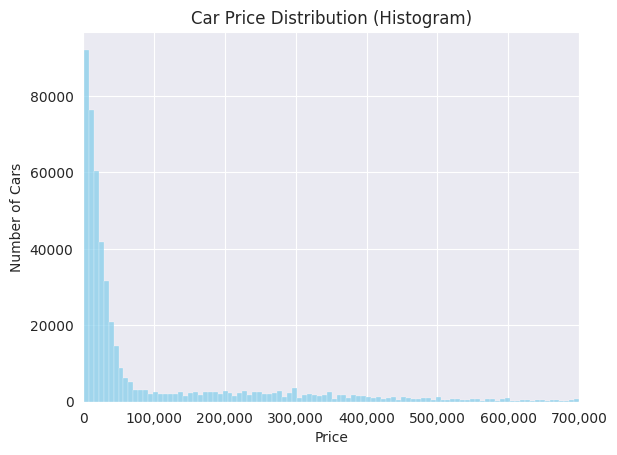

In [42]:
# Make a histplot of the cleaned prices
num_bins = 200
# plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['price'], bins=num_bins, kde=False,
             color="skyblue")  # Use histplot
plt.title("Car Price Distribution (Histogram)")
plt.xlabel("Price")
plt.ylabel("Number of Cars")
plt.xlim(0, 700000)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()